<a href="https://colab.research.google.com/github/bayu1707/DAA/blob/main/SISTEM_CERDAS_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Library
2. Upload file dataset
3. Ubah dataset menjadi dataframe pandas
4. Menampilkan 5 baris pertama data frame
5. Cek info dataset
6. Memeriksa apakah ada nilai-nilai yang hilang dalam DataFrame
7. Memeriksa apakah ada data duplikat di dataframe
8. Periksa korelasi tiap data
9. Hapus data yang tidak berkorelasi
10. Cek outlier tiap data
11. Ubah semua data menjadi numerik
12. Normalisasi data dari skala 0 - 1
13. Lihat distribusi data
14. Bagi data train, data test, dana data validation

10. train & test data. cross validation
11. latih model machine learning dengan data validation dan data train



In [ ]:
# Import library yang akan dipakai

import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yfin
plt.style.use('fivethirtyeight')

In [ ]:
# Ambil data historical saham BCA dari WEB yahoo finance

yfin.pdr_override()
bca = pdr.get_data_yahoo('BBCA.JK', start='2018-01-01', end='2023-10-07')

print(bca)

[*********************100%%**********************]  1 of 1 completed
              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2018-01-01  4380.0  4380.0  4380.0  4380.0  3965.377930          0
2018-01-02  4380.0  4505.0  4365.0  4380.0  3965.377930   82303500
2018-01-03  4385.0  4390.0  4265.0  4380.0  3965.377930   68214000
2018-01-04  4380.0  4445.0  4380.0  4445.0  4024.226074   76567000
2018-01-05  4460.0  4480.0  4435.0  4450.0  4028.752197   65268000
...            ...     ...     ...     ...          ...        ...
2023-10-02  8900.0  9100.0  8875.0  9075.0  9075.000000   93663000
2023-10-03  9075.0  9200.0  9025.0  9200.0  9200.000000   98380200
2023-10-04  9200.0  9250.0  9125.0  9200.0  9200.000000  112582800
2023-10-05  9200.0  9200.0  9075.0  9075.0  9075.000000   72855700
2023-10-06  9100.0  9100.0  9025.0  9025.0  9025.000000   53344400

[1435 rows x 6 columns]


In [ ]:
# Periksa jumlah kolom, baris, range data, tipe data
bca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1435 entries, 2018-01-01 to 2023-10-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1435 non-null   float64
 1   High       1435 non-null   float64
 2   Low        1435 non-null   float64
 3   Close      1435 non-null   float64
 4   Adj Close  1435 non-null   float64
 5   Volume     1435 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.5 KB


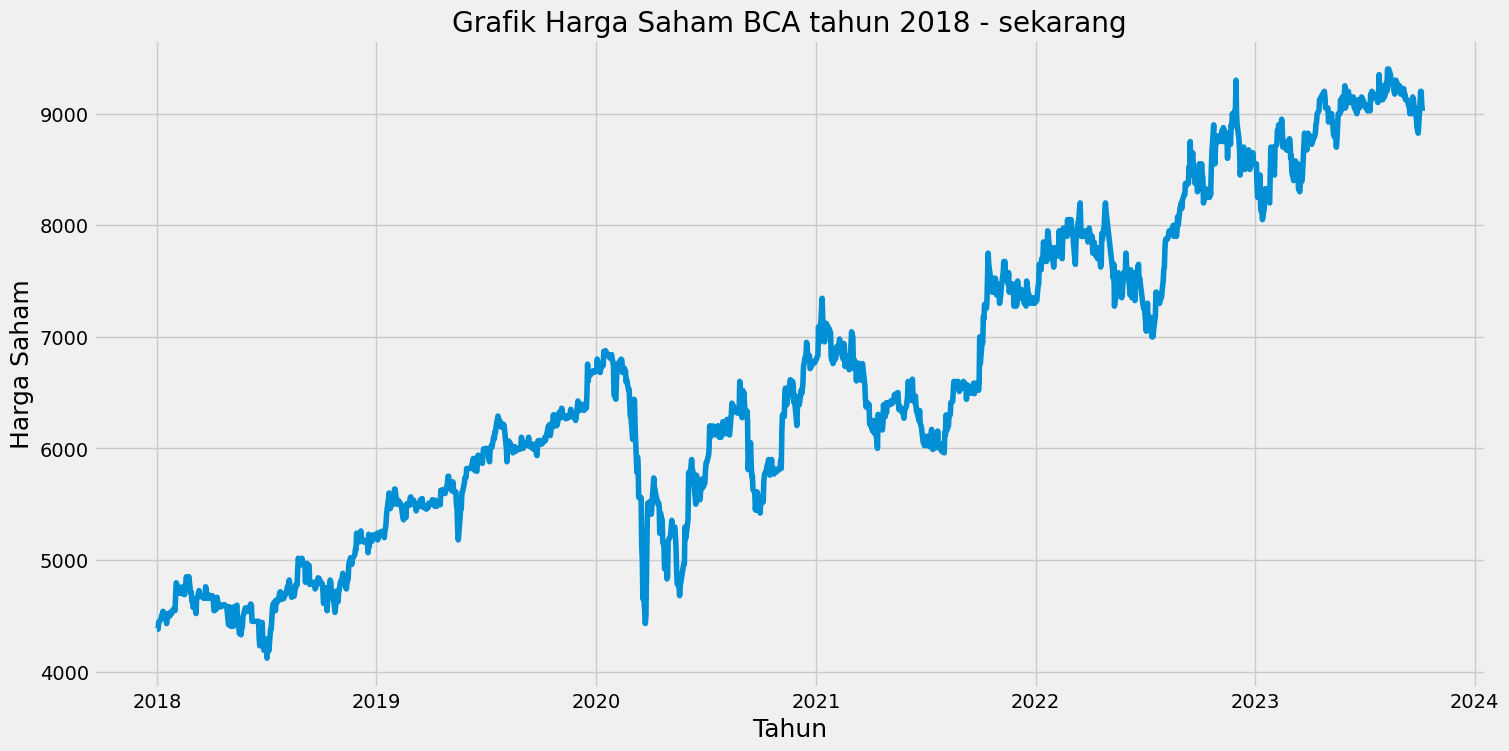

In [ ]:
# Membuat grafik harga saham tahun 2018 - sekarang

plt.figure(figsize=(16,8))
plt.title('Grafik Harga Saham BCA tahun 2018 - sekarang')
plt.plot(bca['Close'])
plt.xlabel('Tahun', fontsize=18)
plt.ylabel('Harga Saham', fontsize=18)
plt.show()

In [ ]:
# Memeriksa apakah ada nilai-nilai yang hilang dalam DataFrame per Kolom
missing_values = bca.isnull().any()

# Menampilkan hasil pemeriksaan
print(missing_values)
print()

#Total Data yang hilang pada Data Frame
print('Total data yang hilang:', bca.isnull().sum().sum())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Total data yang hilang: 0


In [ ]:
# Cek korelasi data
bca.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998699,0.999083,0.998048,0.996726,0.057484
High,0.998699,1.000000,0.998373,0.998889,0.997587,0.077538
Low,0.999083,0.998373,1.000000,0.998988,0.997561,0.044092
Close,0.998048,0.998889,0.998988,1.000000,0.998525,0.058762
Adj Close,0.996726,0.997587,0.997561,0.998525,1.000000,0.062999
Volume,0.057484,0.077538,0.044092,0.058762,0.062999,1.000000


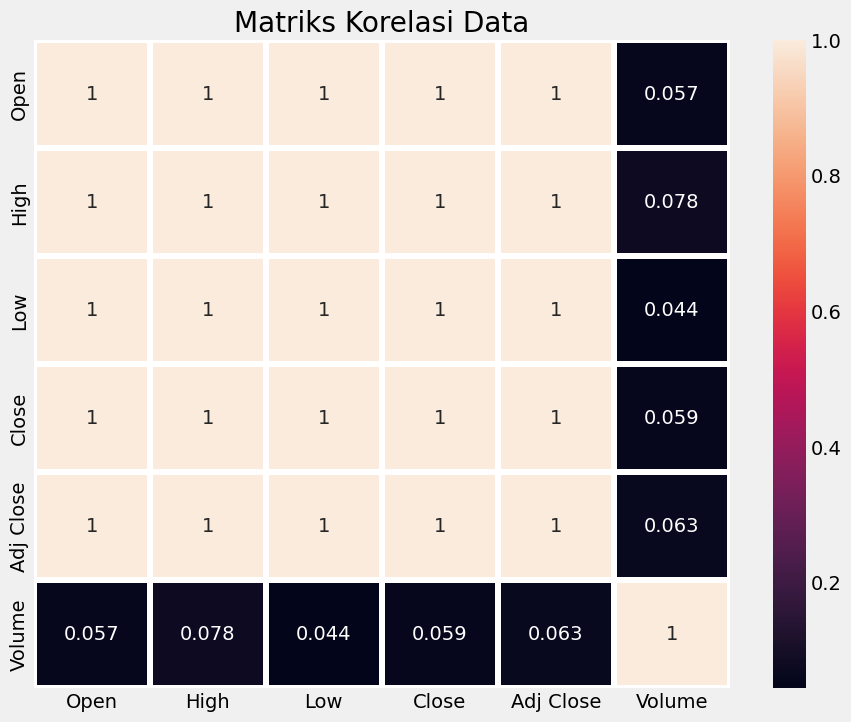

In [ ]:
# Visualisasi korelasi data

plt.figure(figsize=(10,8))
plt.title('Matriks Korelasi Data')
sns.heatmap(bca.corr(), annot=True, linewidths=3)
plt.show()

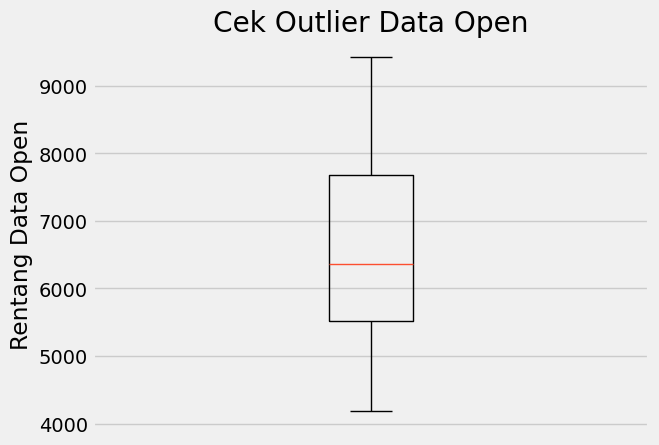

In [ ]:
# Cek outlier tiap data

plt.boxplot(bca['Open'])
plt.title('Cek Outlier Data Open')
plt.xticks([])
plt.ylabel('Rentang Data Open')

plt.show()

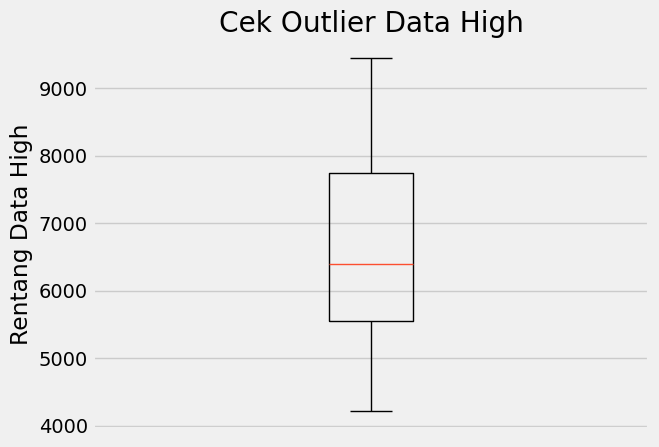

In [ ]:
# Cek outlier tiap data

plt.boxplot(bca['High'])
plt.title('Cek Outlier Data High')
plt.xticks([])
plt.ylabel('Rentang Data High')

plt.show()

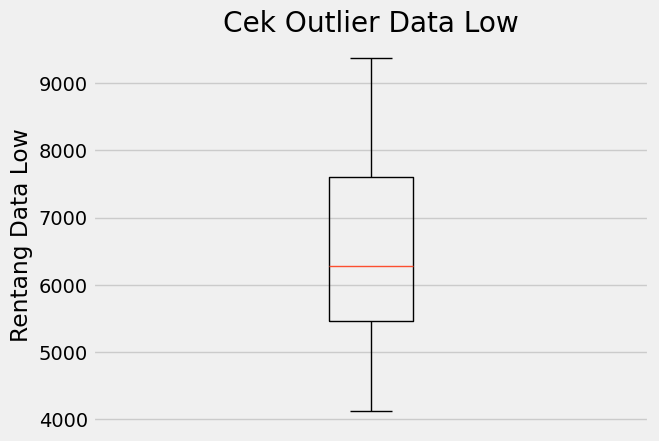

In [ ]:
# Cek outlier tiap data

plt.boxplot(bca['Low'])
plt.title('Cek Outlier Data Low')
plt.xticks([])
plt.ylabel('Rentang Data Low')

plt.show()

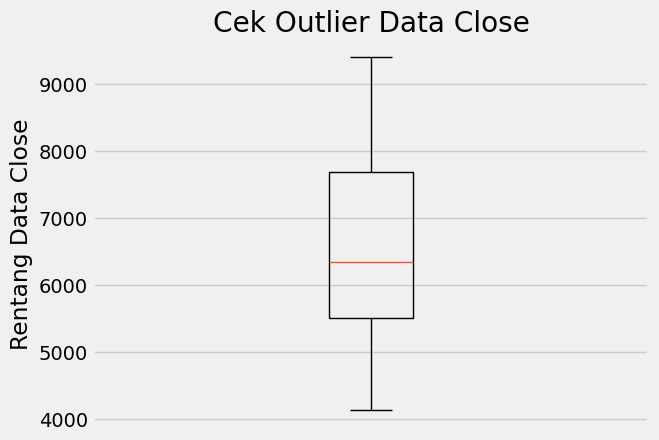

In [ ]:
# Cek outlier tiap data

plt.boxplot(bca['Close'])
plt.title('Cek Outlier Data Close')
plt.xticks([])
plt.ylabel('Rentang Data Close')

plt.show()

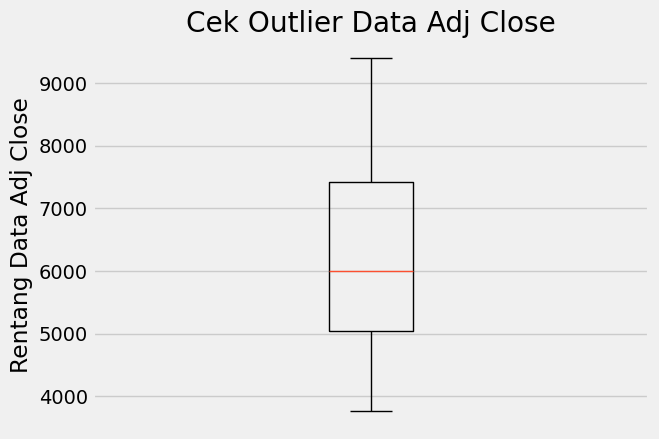

In [ ]:
# Cek outlier tiap data

plt.boxplot(bca['Adj Close'])
plt.title('Cek Outlier Data Adj Close')
plt.xticks([])
plt.ylabel('Rentang Data Adj Close')

plt.show()

In [ ]:
# Cek outlier tiap data

#plt.boxplot(bca['Volume'])
#plt.title('Cek Outlier Data Volume')
#plt.xticks([])
#plt.ylabel('Rentang Data Volume')

#plt.show()

In [ ]:
# Ubah data close menjadi array

close = bca.filter(['Close'])
close_array = close.values
training_data_len = math.ceil( len(close_array) * .8)
training_data_len

1148

In [ ]:
# Normalisasi data dalam rentang 0 - 1

scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[0.04924242],
       [0.04924242],
       [0.04924242],
       ...,
       [0.96212121],
       [0.93844697],
       [0.92897727]])

In [ ]:
# Cek nilai minimum tiap kolom data
scaled_data.min()

0.0

In [ ]:
# Cek nilai maksimum tiap kolom data
scaled_data.max()

1.0

In [ ]:
# Buat data training

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i  in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1088, 60, 1)

In [ ]:
# Model lstm

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1088/1088 [==============================] - 36s 29ms/step - loss: 0.0034
Epoch 2/2
1088/1088 [==============================] - 33s 30ms/step - loss: 0.0013


In [ ]:
# Buat data testing

test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = close_array[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(287, 60, 1)

In [ ]:
# Buat model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print('\nRoot mean square (RMSE):' + str(rmse))

9/9 [==============================] - 1s 17ms/step

Root mean square (RMSE):209.3372271069251


In [ ]:
# Data train, valid, dan prediction untuk grafik

train = bca[:training_data_len]
valid = bca[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-54-d5d26eb2ff22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


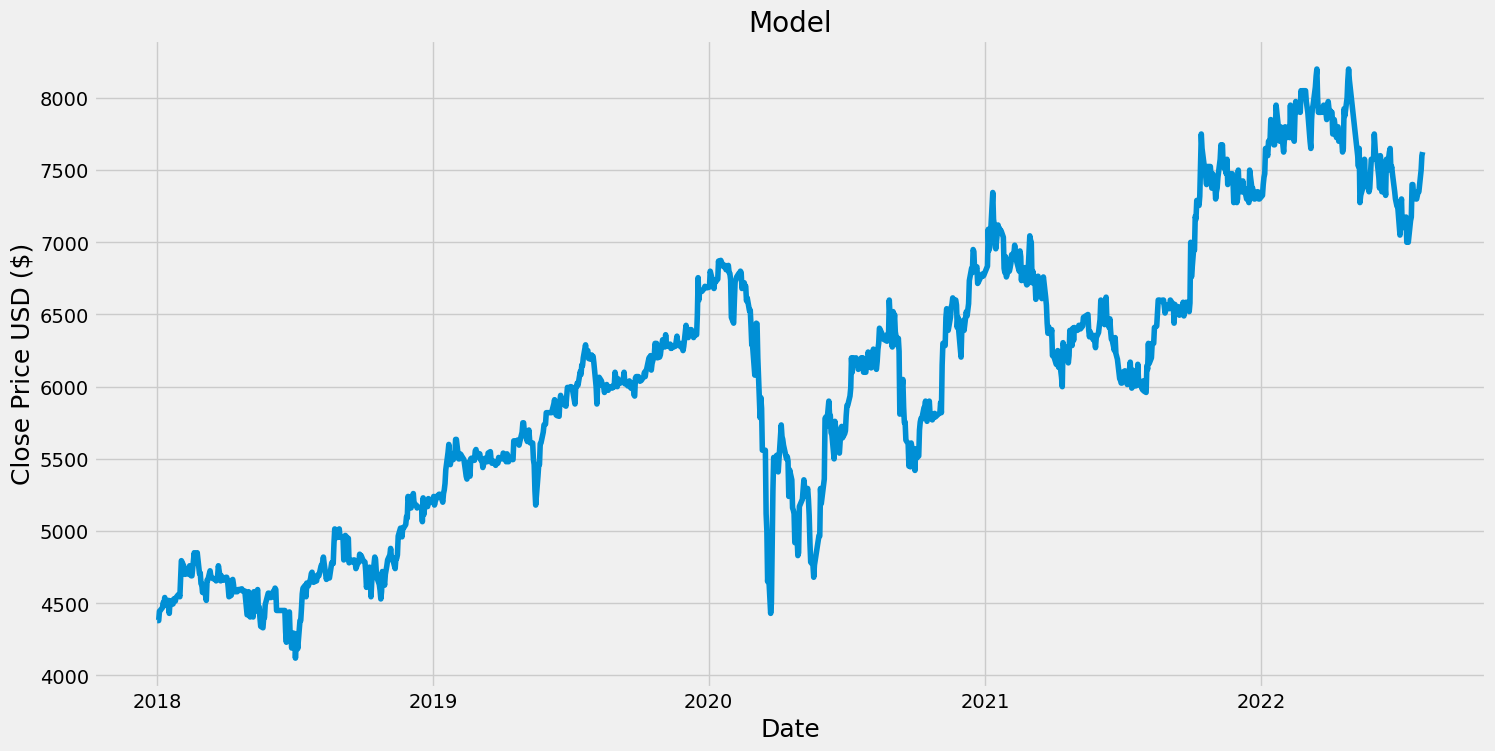

In [ ]:
# Grafik data hasil model ML

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Train')

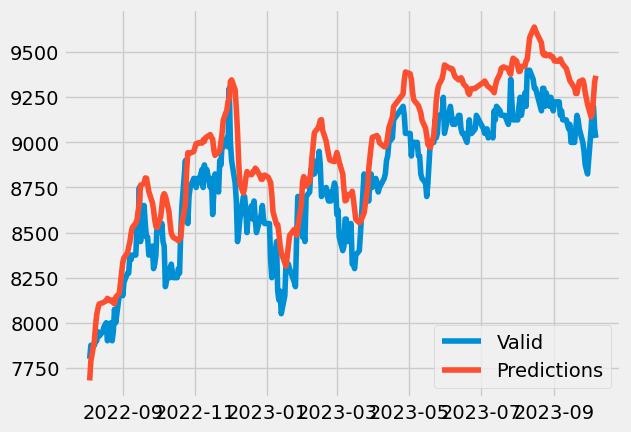

In [ ]:
if len(valid) == len(predictions):
    plt.plot(valid['Close'], label='Valid')
    plt.plot(valid['Predictions'], label='Predictions')
    plt.legend(loc='lower right')
    plt.show()

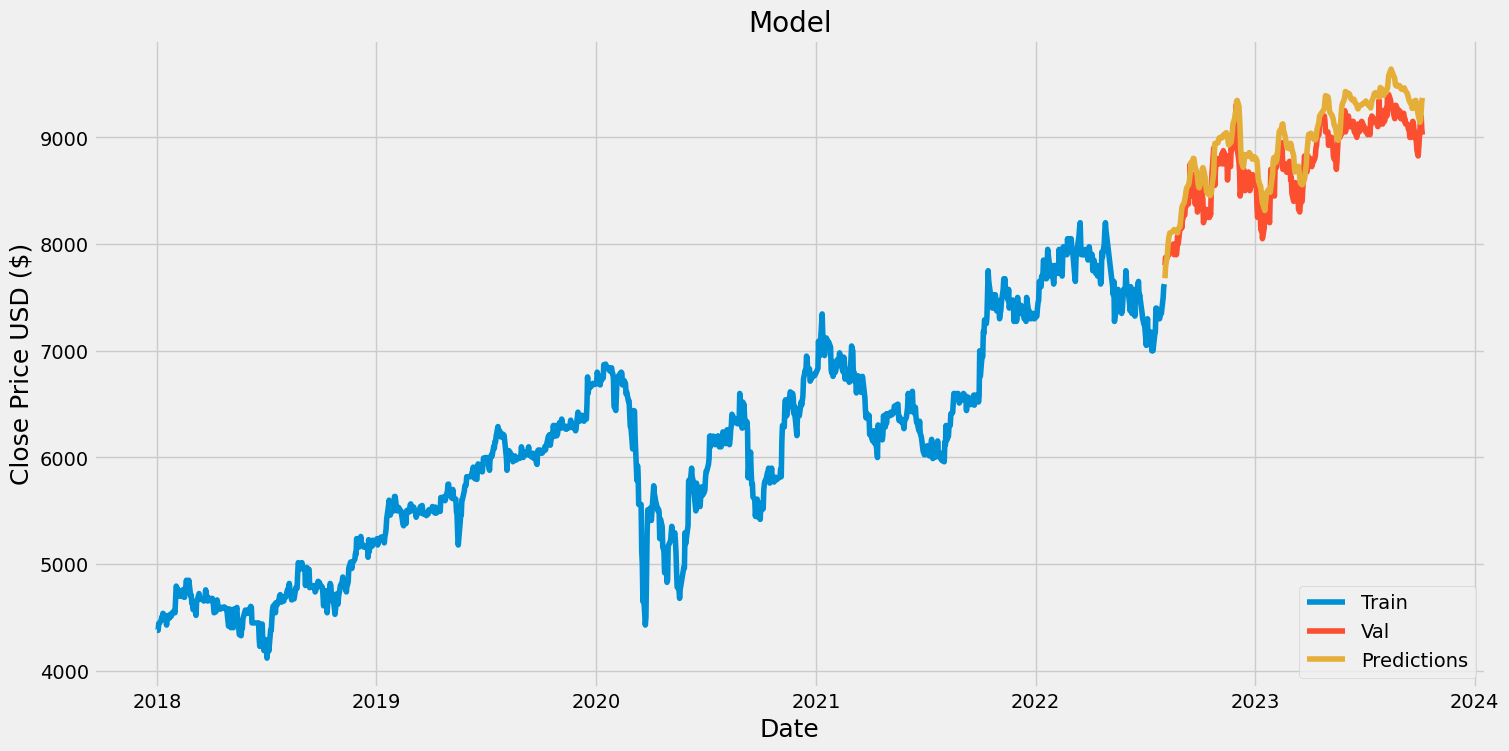

In [ ]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid [['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()